## ALP
#### Nama : Baghiz Zuhdi Adzin 
#### NIM  : 0706022010017

### Import Libarary
Memuat semua Library yang digunakan dalam projek ini

In [1]:
#Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import norm

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Load Dataset
Memuat dataset yang digunakan

#### Deskripsi Kolom:

gender		-> Jenis Kelamin

age			-> Usia

Time			-> Waktu

Number of Warts	-> Jumlah Benjolan/Bisul

Type			-> Tipe Benjolan/Bisul

Area			-> Luas Benjolan/Bisul 

induration diameter	-> diameter indurasi

Result of Treatment	-> Hasil Perawatan (0 untuk tidak ada kemajuan dan 1 untuk ada kemajuan)

In [2]:
# load the data set ans show the first five rows
df = pd.read_csv("https://raw.githubusercontent.com/baghizzhd/DataScience/main/Dataset_Terapi_Kelenjar_Getah_Bening.csv", delimiter=',')
df

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,15,11.00,6.0,1.0,30,25.0,0
1,1,27,11.75,NaN,1.0,208,6.0,0
2,1,32,12.00,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.00,7.0,3.0,64,7.0,0
...,...,...,...,...,...,...,...,...
85,2,51,4.00,1.0,1.0,65,7.0,1
86,2,51,6.00,6.0,NaN,80,2.0,1
87,2,52,2.25,5.0,1.0,63,7.0,1
88,2,53,10.00,1.0,2.0,30,25.0,1


### Exploratory Data Analysis(EDA)
EDA digunakan untuk mendapatkan pemahaman yang lebih baik tentang wawasan dari data. Dengan tujuan mengoptimalkan data, menghasilkan variabel penting, mendeteksi outlier, dan menguji asumsi awal.

In [3]:
#EDA
df.describe()

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
count,90.000000,90.000000,87.000000,89.000000,85.000000,90.000000,88.000000,90.000000
mean,1.544444,31.044444,7.221264,6.123596,1.752941,95.700000,14.500000,0.788889
std,0.500811,12.235435,3.151325,4.231431,0.829599,136.614643,17.378147,0.410383
min,1.000000,15.000000,1.000000,1.000000,1.000000,6.000000,2.000000,0.000000
25%,1.000000,20.250000,5.000000,2.000000,1.000000,35.500000,5.000000,1.000000
50%,2.000000,28.500000,7.750000,6.000000,2.000000,53.000000,7.000000,1.000000
75%,2.000000,41.750000,10.000000,9.000000,2.000000,80.750000,9.000000,1.000000
max,2.000000,56.000000,12.000000,19.000000,3.000000,900.000000,70.000000,1.000000


In [4]:
#cek tipe dan isi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 87 non-null     float64
 3   Number_of_Warts      89 non-null     float64
 4   Type                 85 non-null     float64
 5   Area                 90 non-null     int64  
 6   induration_diameter  88 non-null     float64
 7   Result_of_Treatment  90 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 5.8 KB


In [5]:
#cek ukuran dataset
df.shape

(90, 8)

In [6]:
#Periksa Duplicate value
print(df.duplicated().value_counts())

False    90
dtype: int64


In [7]:
#Mengecek kolom yang null
df.isnull().sum()

gender                 0
age                    0
Time                   3
Number_of_Warts        1
Type                   5
Area                   0
induration_diameter    2
Result_of_Treatment    0
dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


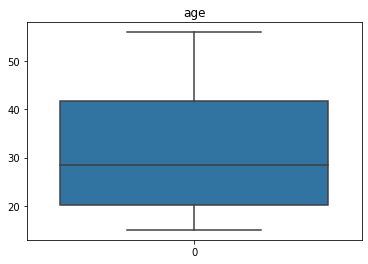

In [8]:
#Melihat Persebaran data
plt.title('age')
print(sns.boxplot(data=df['age']))

#### Dari missing value diatas kita dapat mengisi nya dengan menggunakan regresi model sehingga tidak ada lagi data yang hilang

## Handling Missing Value

### 1. Mengisi Missing value pada kolom time
Menggunakan data kolom 'age' karena mampunyai nilai korelasi tertinggi

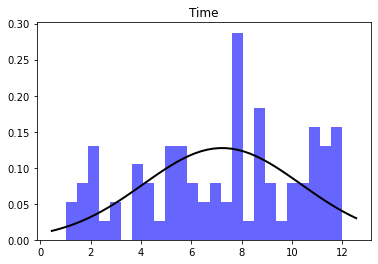

In [11]:
#Tidak digunakan karena data tidak terlalu condong ke kiri atau ke kenan
df1 = df[df['Time'].notna()]
data = df1['Time']
mu, std = norm.fit(data) 
  
# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
plt.title('Time')
plt.show()

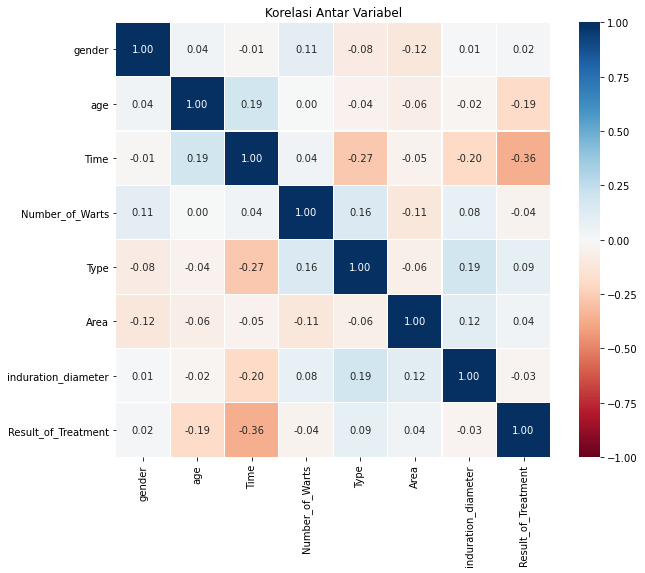

In [12]:
#Melihat korelasi antar variabelnya (Multivariate Exploratory Data Analysis)
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, vmin=-1, vmax=1, cmap='RdBu', annot=True, fmt='.2f', linewidths=0.1, square = True)
plt.title("Korelasi Antar Variabel")
plt.show()

In [13]:
#mengambil kolom yang tidak null
df_time = df.dropna(subset=['Time'])

In [14]:
# variabel independent
X = df_time [['age']]
# Variabel Dependent
y = df_time ['Time']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Model regresi linear
lr = LinearRegression()
lr.fit(X_train,y_train)
# Memasukkan nilai prediksi dari data-test
y_pred = lr.predict(X_test)

In [16]:
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test, y_pred)))
#Pada perhitungan nilai MAPE
def MAPE(y_test,y_pred):
    mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
    return mape
# Prediksi pada data-test
LR_Test_predict = lr.predict(X_test) 
 
# Menghitung nilai MAPE
LR_MAPE= MAPE(y_test,LR_Test_predict)
print("MAPE: ",LR_MAPE)


Root Mean Squared Error (RMSE):  3.062142907732708
MAPE:  38.84004899146566


Memiliki nilai RMSE cukup rendah dan nilai mape diantara 20-50 yang tergolong wajar

In [17]:
df[df['Time'].isna()]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
43,1,38,NaN,8.0,2.0,56,45.0,1
50,1,54,NaN,13.0,3.0,43,5.0,1
72,2,28,NaN,4.0,1.0,9,2.0,1


In [18]:
df_time_nan = df["Time"].isna()
df_time_predict = pd.DataFrame(df[['age']][df_time_nan])
time_pred = np.round(lr.predict(df_time_predict), 2)
missing_value = df['Time'].isna()
df.loc[missing_value,'Time'] = time_pred

In [19]:
df.iloc[[43,50,72]]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
43,1,38,7.42,8.0,2.0,56,45.0,1
50,1,54,8.30,13.0,3.0,43,5.0,1
72,2,28,6.86,4.0,1.0,9,2.0,1


In [20]:
df.isna().sum()

gender                 0
age                    0
Time                   0
Number_of_Warts        1
Type                   5
Area                   0
induration_diameter    2
Result_of_Treatment    0
dtype: int64

### 2. Mengisi Missing value pada kolom 'Number of Warts' dan 'Induration Diameter'
Menggunakan Median karena data skewed dan tipe data numeric

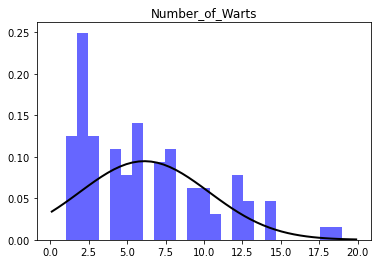

In [21]:
df2 = df[df['Number_of_Warts'].notna()]
data = df2['Number_of_Warts']
mu, std = norm.fit(data) 
  
# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
plt.title('Number_of_Warts')
plt.show()

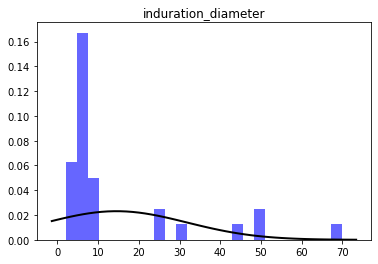

In [22]:
df2 = df[df['induration_diameter'].notna()]
data = df2['induration_diameter']
mu, std = norm.fit(data) 
  
# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
plt.title('induration_diameter') 
plt.show()

In [23]:
#Mengisi missing value dengan median karena data skewed dan tipe data numeric
df['Number_of_Warts']=df['Number_of_Warts'].fillna(np.floor(df['Number_of_Warts'].median()))
df['induration_diameter']=df['induration_diameter'].fillna(np.floor(df['induration_diameter'].median()))

In [24]:
df.isnull().sum()

gender                 0
age                    0
Time                   0
Number_of_Warts        0
Type                   5
Area                   0
induration_diameter    0
Result_of_Treatment    0
dtype: int64

In [25]:
df.isna().sum()

gender                 0
age                    0
Time                   0
Number_of_Warts        0
Type                   5
Area                   0
induration_diameter    0
Result_of_Treatment    0
dtype: int64

### 3. Mengisi Missing value pada kolom Type
Menggunakan modus karena tipe data categorical dan missing value hanya 5 tergolong sedikit

In [26]:
dfdrop = df.dropna()
X = dfdrop[['induration_diameter', 'Number_of_Warts']]
y = dfdrop['Type']

In [27]:
import numpy as np

# Importing the SimpleImputer class
imputer = SimpleImputer(missing_values = np.nan,strategy ='most_frequent')
data = df['Type']
imputer.fit(data.values.reshape(-1,1))

# Imputing the data	
data = imputer.transform(data.values.reshape(-1,1))

In [28]:
df['Type'] = np.array(data)

In [29]:
print(df['Type'].unique())

[1. 2. 3.]


In [30]:
df.isna().sum()

gender                 0
age                    0
Time                   0
Number_of_Warts        0
Type                   0
Area                   0
induration_diameter    0
Result_of_Treatment    0
dtype: int64

### Mengatasi Target atribut yang imbalance
Untuk mengatasi imbalence pada dataset akan menggunakan metode 'oversample smote'

In [31]:
#periksa variable target
df['Result_of_Treatment'].value_counts()

1    71
0    19
Name: Result_of_Treatment, dtype: int64

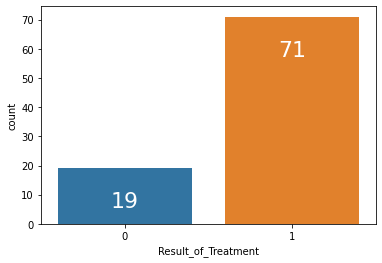

In [32]:
ax=sns.countplot(x=df['Result_of_Treatment'], data=df);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=22)

In [33]:
#Mengatasi Imbalance
X = df[['gender', 'age', 'Number_of_Warts', 'Area', 'induration_diameter','Type', 'Time']]
y = df['Result_of_Treatment']
oversample = SMOTE(random_state = 0)
X_smote, y_smote = oversample.fit_resample(X, y)
df2 = pd.DataFrame(X_smote)
df2["Result_of_Treatment"] = y_smote

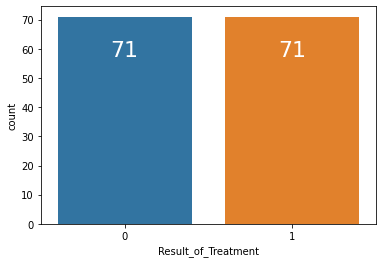

In [34]:
ax=sns.countplot(x=df2['Result_of_Treatment'], data=df);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=22)

### Regresi Model

In [35]:
X = df2.iloc[:, :-1].values
y = df2.iloc[:, -1].values

#### Linear Regression

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test, y_pred)))
LR_MAPE= mean_absolute_percentage_error(y_test, y_pred)*100
print("MAPE: ",LR_MAPE)

Root Mean Squared Error (RMSE):  0.4464800137744451
MAPE:  6.682053649983544e+16


#### Random Forest Regressor

In [37]:
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train,y_train)
rfr_y_pred = rf.predict(X_test)
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test, rfr_y_pred)))
LR_MAPE= mean_absolute_percentage_error(y_test, rfr_y_pred)*100
print("MAPE: ",LR_MAPE)

Root Mean Squared Error (RMSE):  0.3732014340069282
MAPE:  3.509701778571492e+16


#### Support Vector Regression(SVR)

In [38]:
svr = SVR().fit(X_train,y_train)
svr_y_pred = svr.predict(X_test)
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test, svr_y_pred)))
LR_MAPE= mean_absolute_percentage_error(y_test, svr_y_pred)*100
print("MAPE: ",LR_MAPE)

Root Mean Squared Error (RMSE):  0.5382167901331506
MAPE:  3.935134132909101e+16


#### Menggunakan Random Forest Regressor karena memiliki nilai RMSE dan MAPE yang paling baik

In [39]:
compare = pd.DataFrame({"Real":y_test, "Predicted":rfr_y_pred})
compare

,Real,Predicted
0,1,0.48
1,0,0.14
2,1,0.94
3,0,0.01
4,0,0.32
5,1,0.57
6,0,0.20
7,1,0.53
8,1,0.85
9,1,0.87


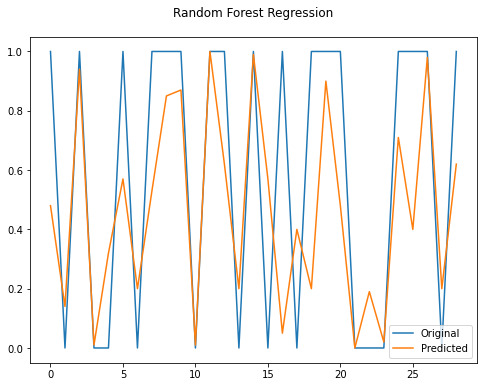

In [40]:
x_ax = range(len(y_test))
plt.figure(figsize=(8, 6))
plt.plot(x_ax, y_test, label="Original")
plt.plot(x_ax, rfr_y_pred, label="Predicted")
plt.title("Random Forest Regression", pad=20)
plt.legend(loc='best')

### Klasifikasi

In [41]:
#Membagi variabel independent dan dependent pada data train
X = df2.iloc[:,:-1].values
y = df2.iloc[:, -1].values

In [42]:
#Split data pada data train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [43]:
# scaling pada variabel X_train dan X_test.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Logistic Regression

In [44]:
#Logistic Regression Model pada data train
classifier1 = LogisticRegression(random_state = 0)
classifier1.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [45]:
#Uji model dengan dataset test pada data train
y_pred = classifier1.predict(X_test)
print(y_pred)

[0 0 1 0 1 0 0 0 1 1 0 1 0 0 1]


In [46]:
#Menghitung confusion matrix, akurasi model, Recall, Precision, F1-Score
print("Logistic Regression :")
cm1 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm1)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print('Recall: {}'.format(recall_score(y_test, y_pred)))
print('Precision: {}'.format(precision_score(y_test, y_pred)))
print('F1-Score: {}'.format(f1_score(y_test, y_pred)))

Logistic Regression :
Confusion Matrix
 [[5 2]
 [4 4]]
Accuracy Score:  0.6
Recall: 0.5
Precision: 0.6666666666666666
F1-Score: 0.5714285714285715


#### Naive Bayes


In [47]:
# instantiate the model
model = GaussianNB()

# fit the model
model.fit(X_train, y_train)

GaussianNB()

In [48]:
#Uji model dengan dataset test pada data train
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 1 1 0 1 1 0 0]


In [49]:
#Menghitung confusion matrix, akurasi model, Recall, Precision, F1-Score
print("Naive Bayes :")
cm2 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm2)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print('Recall: {}'.format(recall_score(y_test, y_pred)))
print('Precision: {}'.format(precision_score(y_test, y_pred)))
print('F1-Score: {}'.format(f1_score(y_test, y_pred)))

Naive Bayes :
Confusion Matrix
 [[7 0]
 [4 4]]
Accuracy Score:  0.7333333333333333
Recall: 0.5
Precision: 1.0
F1-Score: 0.6666666666666666


#### K-Nearest Neighbour (K-NN) Classifier

In [50]:
classifier = KNeighborsClassifier(n_neighbors = 3, metric = "euclidean", p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [51]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 1 0 0 0 1 0 1 1 0 1 1 0 0]


In [52]:
#Menghitung confusion matrix, akurasi model, Recall, Precision, F1-Score

print("K-Nearest Neighbour (K-NN) :")
cm1 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm1)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print('Recall: {}'.format(recall_score(y_test, y_pred)))
print('Precision: {}'.format(precision_score(y_test, y_pred)))
print('F1-Score: {}'.format(f1_score(y_test, y_pred)))

K-Nearest Neighbour (K-NN) :
Confusion Matrix
 [[7 0]
 [2 6]]
Accuracy Score:  0.8666666666666667
Recall: 0.75
Precision: 1.0
F1-Score: 0.8571428571428571


#### Dari ketiga model klasifikasi diatas, K-Nearest Neighbour (K-NN) memiliki nilai akurasi tertinggi sehingga digunakan sebagai prediksi model 

In [53]:
#Uji model logistic regression
lg_y_pred = classifier.predict(X_test)

d= {'Real': y_test,'Predicted': lg_y_pred}
lgdf =pd.DataFrame(data=d)
lgdf


,Real,Predicted
0,0,0
1,1,0
2,1,1
3,0,0
4,0,0
5,0,0
6,1,1
7,1,0
8,1,1
9,1,1


In [54]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 1 0 0 0 1 0 1 1 0 1 1 0 0]


## Clustering

In [55]:
sc = StandardScaler()
standardized_data = sc.fit_transform(df2)
standardized_data

array([[-0.91877954, -1.59941371, -0.0953898 , ..., -0.93959808,
         0.9498383 , -1.        ],
       [-0.91877954, -0.49287657, -0.0953898 , ..., -0.93959808,
         1.1887545 , -1.        ],
       [-0.91877954, -0.03181944,  0.70085911, ..., -0.93959808,
         1.26839323, -1.        ],
       ...,
       [ 1.08840038,  0.70587199,  1.14656276, ...,  0.50239805,
         0.9702728 , -1.        ],
       [-0.91877954,  0.15260342,  1.13008858, ..., -0.10615344,
         1.17042871, -1.        ],
       [-0.91877954,  0.89029484,  0.52408799, ..., -0.93959808,
         1.17814639, -1.        ]])

In [56]:
standardized_df = pd.DataFrame(standardized_data,columns=['gender','age','time','warts_count','type','area','induration_diameter','treatment_result'])
standardized_df.head()

,gender,age,time,warts_count,type,area,induration_diameter,treatment_result
0,-0.91878,-1.599414,-0.095390,-0.514910,0.727323,-0.939598,0.949838,-1.0
1,-0.91878,-0.492877,-0.095390,1.057883,-0.499072,-0.939598,1.188754,-1.0
2,-0.91878,-0.031819,0.700859,-0.400043,2.340999,-0.939598,1.268393,-1.0
3,-0.91878,0.060392,0.170027,2.568825,-0.434525,0.415474,-1.996795,-1.0
4,-0.91878,0.152603,0.170027,-0.214489,-0.434525,1.770545,-0.961491,-1.0


#### K-Means Clustering

In [57]:
sse = [] #within cluster sum of square


# check the inertia for each K
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state=42)
    kmeans.fit(standardized_df)
    sse.append(kmeans.inertia_)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

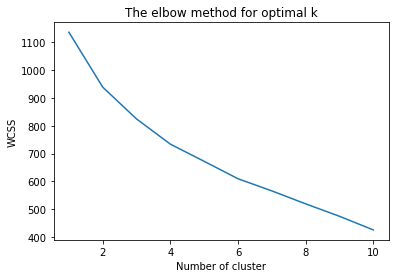

In [58]:
plt.plot(range(1,11), sse)
plt.title('The elbow method for optimal k')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

In [59]:
# using kneelocator to find the elbow/knee
findknee = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
print("The best knee for model = ", findknee.elbow)

The best knee for model =  4


In [60]:
X = standardized_data
kmeans = KMeans(init='random',n_clusters = 4, n_init = 300, random_state = 1).fit(X)
kmeans.labels_

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 2, 3, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 3,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 3, 0, 1, 1, 0, 0, 3, 1, 1, 0, 0, 0,
       0, 1, 3, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 3,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 1, 0, 0, 3, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 1, 0, 3, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2])

In [61]:
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [62]:
df2['KMeans_Clusters'] = y_kmeans

df2.groupby("KMeans_Clusters").agg(Gender = ('gender', pd.Series.mode), 
                          Age = ('age', 'mean'), 
                          Time = ('Time', 'mean'), 
                          Warts_Count = ('Number_of_Warts', 'mean'), 
                          Type = ('Type', pd.Series.mode), 
                          Area = ('Area', 'mean'), 
                          Induration_Diameter = ('induration_diameter', 'mean'), 
                          Treatment_Result = ('Result_of_Treatment', pd.Series.mode), 
                          Count = ('KMeans_Clusters', 'count'))

,Gender,Age,Time,Warts_Count,Type,Area,Induration_Diameter,Treatment_Result,Count
KMeans_Clusters,,,,,,,,,
0,1,30.466667,4.915511,7.725837,3.0,52.633333,19.479369,1,30
1,2,28.227273,7.033627,4.542562,1.0,58.000000,8.612014,1,44
2,1,36.559322,10.562158,7.079896,1.0,71.915254,14.707061,0,59
3,1,31.111111,6.498334,5.963632,1.0,462.333333,13.211545,1,9


### hierarchical cluster

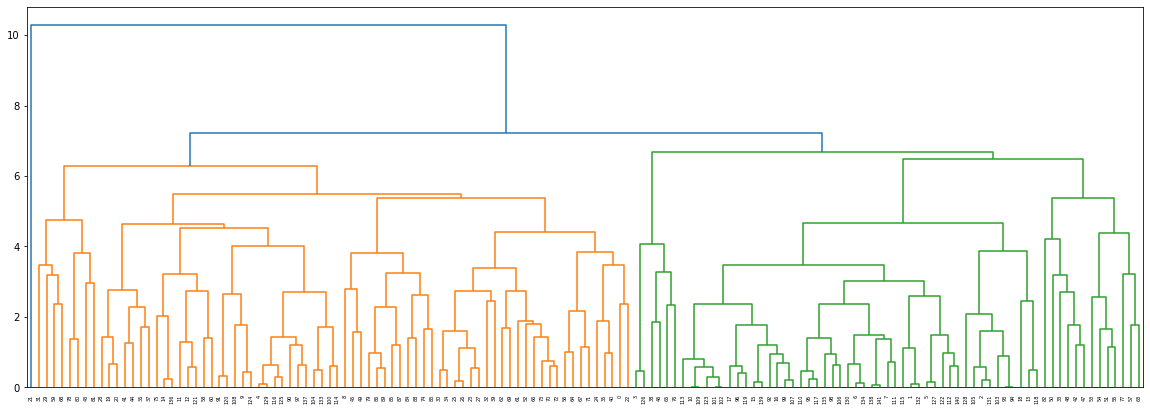

In [63]:
plt.figure(figsize=(20,7))
linkage_data = linkage(X, method='complete')
dendrogram(linkage_data)
plt.show()

In [64]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
labels = hierarchical_cluster.fit_predict(X)
labels

array([2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2,
       2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 2, 2, 0, 0, 0, 0], dtype=int64)

In [65]:
df2['hierarchical_cluster'] = y_kmeans

df2.groupby("hierarchical_cluster").agg(Gender = ('gender', pd.Series.mode), 
                          Age = ('age', 'mean'), 
                          Time = ('Time', 'mean'), 
                          Warts_Count = ('Number_of_Warts', 'mean'), 
                          Type = ('Type', pd.Series.mode), 
                          Area = ('Area', 'mean'), 
                          Induration_Diameter = ('induration_diameter', 'mean'), 
                          Treatment_Result = ('Result_of_Treatment', pd.Series.mode),
                          Count = ('hierarchical_cluster', 'count'))

,Gender,Age,Time,Warts_Count,Type,Area,Induration_Diameter,Treatment_Result,Count
hierarchical_cluster,,,,,,,,,
0,1,30.466667,4.915511,7.725837,3.0,52.633333,19.479369,1,30
1,2,28.227273,7.033627,4.542562,1.0,58.000000,8.612014,1,44
2,1,36.559322,10.562158,7.079896,1.0,71.915254,14.707061,0,59
3,1,31.111111,6.498334,5.963632,1.0,462.333333,13.211545,1,9
